<a href="https://colab.research.google.com/github/Aniket1313/EDA/blob/master/Oultliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outliers and their impact on ML





Which ML algoriths are  sensitive to outliers
1.

1.   Naive Bayes--------------------------Not Sensitive
2.   SVM-------------- Not Sensi
3.   Linear regression------------Sensitive
4.   Logistic Regression----------Sensitive
5.  Decision Tree Regressor or Classifier-------Not Sensitive
6.  Ensemble(RF,XGBoost,GB)------------------Not Sensitive
7.   KNN-------------------------------------Not Sensitive
8.   KMeans --------------------------------Sensitive
9.   Hierarichal Clustering ----------------Sensitive
10.  PCA-----------------------------------Highly Sensitive
11.  NN------------------------------Sensitve
12.  LDA ------------------------Not sensitive



In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [ ]:
data = pd.read_csv(url)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


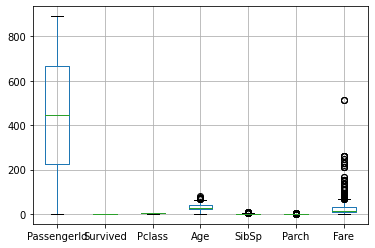

In [ ]:
data.boxplot()

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Age'].isnull().sum()

177

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


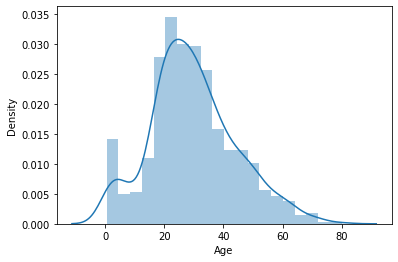

In [ ]:
sns.distplot(data['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


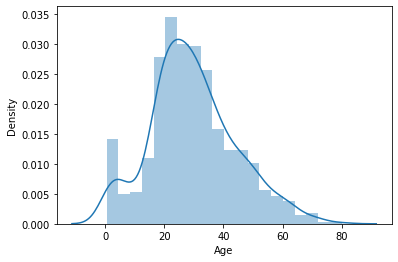

In [ ]:
sns.distplot(data['Age'].dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


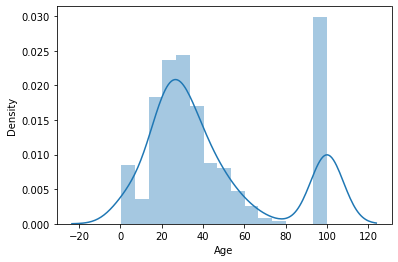

In [ ]:
sns.distplot(data['Age'].fillna(100))

In [ ]:
data['Age'].isna().sum()


177

# Gaussian Distribution

Text(0, 0.5, 'No. of Passenger')

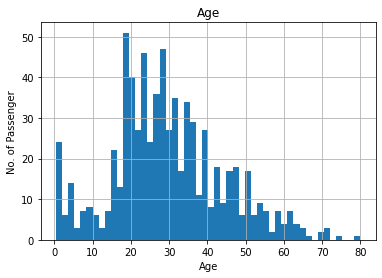

In [ ]:
fig = data.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No. of Passenger')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

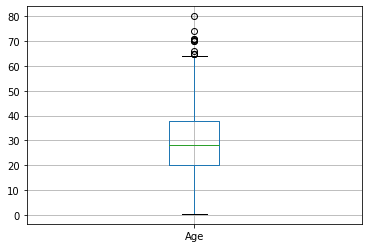

In [ ]:
figure = data.boxplot(column = "Age")
data["Age"].describe()

In [ ]:
#Calculate the boundaries that differentiates the outliers

upper_boundary  = data.Age.mean() + 3*data.Age.std()
upper_boundary

73.27860964406095

In [ ]:
lower_boundary  = data.Age.mean() - 3*data.Age.std()
lower_boundary

-13.88037434994331

In [ ]:
print("Mean:",data.Age.mean(),"lower_boundary:",lower_boundary,"upper_boundary:" ,upper_boundary)

Mean: 29.69911764705882 lower_boundary: -13.88037434994331 upper_boundary: 73.27860964406095


In [ ]:
#IQR diff b/e 75 and 25 percentile
IQR = data.Age.quantile(0.75)-  data.Age.quantile(0.25)
IQR

17.875

In [ ]:
lower_bridge = data.Age.quantile(0.25) - (IQR*1.5)
lower_bridge

-6.6875

In [ ]:
upper_bridge = data.Age.quantile(0.75) + (IQR*1.5)
upper_bridge

64.8125

In [ ]:
#ignoring -6 we consider 64 as age cant be negative

In [ ]:
#Extreme outliers 
lower_bridge = data.Age.quantile(0.25) - (IQR*3)

upper_bridge = data.Age.quantile(0.75) + (IQR*3)
print(upper_bridge),print(lower_bridge)

91.625
-33.5


(None, None)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

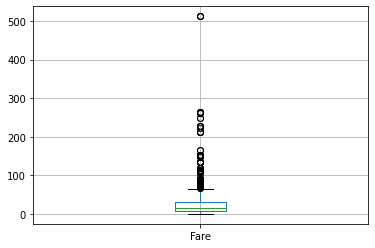

In [ ]:
figure = data.boxplot("Fare")
data.Fare.describe()

In [ ]:
data.shape

(891, 12)

#Features are skewed 

Text(0, 0.5, 'No. of Passenger')

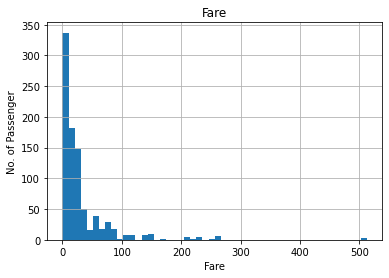

In [ ]:
fig = data.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of Passenger')

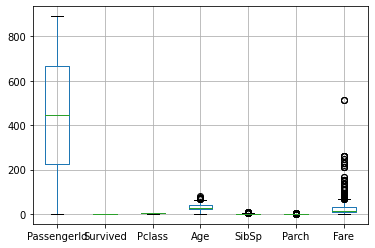

In [ ]:
data.boxplot()

In [ ]:
#Upper_lower bondaries

upper_boundary  = data.Fare.mean() + 3*data.Fare.std()
print(upper_boundary)
lower_boundary  = data.Fare.mean() - 3*data.Fare.std()
print(lower_boundary)

181.2844937601173
-116.87607782296811


In [ ]:
IQR = data.Fare.quantile(0.75)-  data.Fare.quantile(0.25)
IQR

23.0896

In [ ]:
 #Extreme outliers 
lower_bridge = data.Fare.quantile(0.25) - (IQR*3)

upper_bridge = data.Fare.quantile(0.75) + (IQR*3)
print("Upper:", upper_bridge),print("Lower:", lower_bridge)

Upper: 100.2688
Lower: -61.358399999999996


(None, None)

#Fare cannot be negative
Thus we consider 100

In [ ]:
df = data.copy()

In [ ]:
df.loc[df.Age>=73,"Age"]=73

In [ ]:
df.loc[df.Fare>=100,"Fare"]=100

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No. of Passenger')

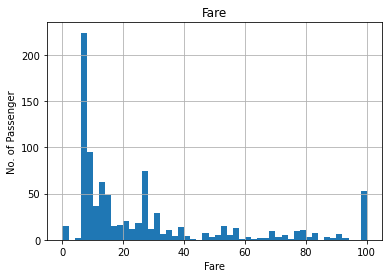

In [ ]:
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of Passenger')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size =0.3)

1. LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)
print(y_pred.shape)
print(y_pred1.shape)


(268,)
(268, 2)


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score :{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score :{}".format(roc_auc_score(y_test,y_pred1[:,1])))


Accuracy_score :0.6977611940298507
roc_auc_score :0.7191776710684274


2. RANDOM FORREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
y_pred1 = clf2.predict_proba(X_test)
print(y_pred.shape)
print(y_pred1.shape)


(268,)
(268, 2)


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score :{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score :{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score :0.664179104477612
roc_auc_score :0.6988595438175271
